# Airline Flights Data Exploration

## Preliminary Wrangling

This document explores a dataset containing times and attributes for approximately 160000 airline flights.

In [156]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

In [157]:
flights = pd.read_csv('flight_data_2008.csv')

In [158]:
flights.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,1343.0,1325,1451.0,1435,WN,588,...,4.0,9.0,0,NaN,0,16.0,0.0,0.0,0.0,0.0
1,2008,1,3,4,1125.0,1120,1247.0,1245,WN,1343,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,2009.0,2015,2136.0,2140,WN,3841,...,2.0,14.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,903.0,855,1203.0,1205,WN,3,...,5.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1423.0,1400,1726.0,1710,WN,25,...,6.0,10.0,0,NaN,0,16.0,0.0,0.0,0.0,0.0


In [159]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2389217 entries, 0 to 2389216
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             float64
 20  TaxiOut            float64
 21  Cancelled          int64  
 22  CancellationCode   object 
 23  Diverted           int64  
 24  CarrierDelay       float64
 25  WeatherDelay      


There are 2389217 flights in the dataset with 29 features . Most variables are numeric in nature.

- 1	Year	2008
- 2	Month	1-12
- 3	DayofMonth	1-31
- 4	DayOfWeek	1 (Monday) - 7 (Sunday)
- 5	DepTime	actual departure time (local, hhmm)
- 6	CRSDepTime	scheduled departure time (local, hhmm)
- 7	ArrTime	actual arrival time (local, hhmm)
- 8	CRSArrTime	scheduled arrival time (local, hhmm)
- 9 UniqueCarrier	unique carrier code
- 10 FlightNum	flight number
- 11 TailNum	plane tail number
- 12 ActualElapsedTime	in minutes
- 13 CRSElapsedTime	in minutes
- 14 AirTime	in minutes
- 15 ArrDelay	arrival delay, in minutes
- 16 DepDelay	departure delay, in minutes
- 17 Origin	origin IATA airport code
- 18 Dest	destination IATA airport code
- 19 Distance	in miles
- 20 TaxiIn	taxi in time, in minutes
- 21 TaxiOut	taxi out time in minutes
- 22 Cancelled	was the flight cancelled?
- 23 CancellationCode	reason for cancellation (A = carrier, B = weather, C = NAS, D = security)
- 24 Diverted	1 = yes, 0 = no
- 25 CarrierDelay	in minutes
- 26 WeatherDelay	in minutes
- 27 NASDelay	in minutes
- 28 SecurityDelay	in minutes
- 29 LateAircraftDelay	in minutes
### What is/are the main feature(s) of interest in your dataset?

I'm most interested in figuring out what features are best for predicting whether the plane is Cancelled, Diverted, Delayed (and to what degree), or On time/ early.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that the Carrier will have an effect on how often the plane is Cancelled, Diverted, Delayed, or On Time 

## Univariate Exploration

I'll start by looking at the distribution of the main variable of interest: flight status. I will need to create this variable first through a nested np.where() statement

In [163]:
flights['flight_status'] = np.where(flights.Cancelled, 'Cancelled', np.where(flights.Diverted, 'Diverted', np.where(flights.ArrDelay >= 15, 'Delayed', 'On Time/Early')))

In [164]:
flights.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,flight_status
0,2008,1,3,4,1343.0,1325,1451.0,1435,WN,588,...,9.0,0,NaN,0,16.0,0.0,0.0,0.0,0.0,Delayed
1,2008,1,3,4,1125.0,1120,1247.0,1245,WN,1343,...,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,On Time/Early
2,2008,1,3,4,2009.0,2015,2136.0,2140,WN,3841,...,14.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,On Time/Early
3,2008,1,3,4,903.0,855,1203.0,1205,WN,3,...,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,On Time/Early
4,2008,1,3,4,1423.0,1400,1726.0,1710,WN,25,...,10.0,0,NaN,0,16.0,0.0,0.0,0.0,0.0,Delayed


### Graph barplot for count of each flight status

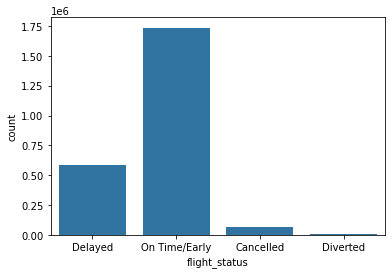

In [173]:
base_color = sb.color_palette()[0]
sb.countplot(data = flights, x = 'flight_status', color = base_color);

- We have about 1.75 million On Time/ Early flights, half a million Delayed flights, and very few cancelled and diverted flights

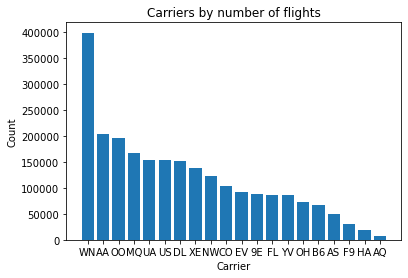

In [166]:
plt.bar(flights.UniqueCarrier.value_counts().index, flights.UniqueCarrier.value_counts().values)
plt.xlabel('Carrier')
plt.ylabel('Count')
plt.title('Carriers by number of flights');

- It looks like the most frequent carrier in terms of flights 'WN' has close to double the flights even the next most frequent carrier

### Graph relative frequency for Day of the Week

In [167]:
n_flights = len(flights)
max_dayofweek_count = flights.DayOfWeek.value_counts().values[0]
max_prop = max_dayofweek_count/ n_flights
max_prop

0.15300410134366196

In [168]:
tick_props = np.arange(0, max_prop, 0.02)
tick_names = ['{:.2f}'.format(v) for v in tick_props]
tick_names

['0.00', '0.02', '0.04', '0.06', '0.08', '0.10', '0.12', '0.14']

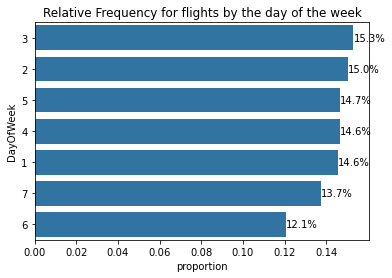

In [170]:
sb.countplot(data = flights, y = 'DayOfWeek', color = base_color, order = flights.DayOfWeek.value_counts().index)
plt.xticks(tick_props * n_flights, tick_names)
plt.xlabel('proportion')
plt.title('Relative Frequency for flights by the day of the week')
for i in range(flights.DayOfWeek.value_counts().shape[0]):
    count = flights.DayOfWeek.value_counts().values[i]
    pct_string = '{:0.1f}%'.format(100*count/n_flights)
    plt.text(count+1, i, pct_string, va = 'center');

- Saturday and Sunday are when flights are less frequent, with Saturday contributing over 2.5% less to overall flights than the weekday average

## Bivariate Exploration

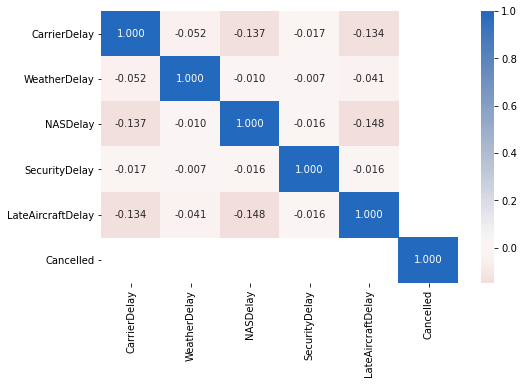

In [171]:
plt.figure(figsize = [8, 5])
sb.heatmap(flights[['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'Cancelled']].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

In [ ]:
midnight_flights.ArrTime.astype(int).astype(str).str.pad(4, fillchar = '0')

In [ ]:
flights.head()

In [ ]:
flights[flights.DepTime == '00:00']

In [ ]:
flights.info()

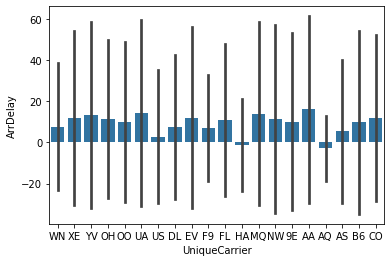

In [174]:
sb.barplot(data = flights, x = 'UniqueCarrier', y = 'ArrDelay', ci = 'sd', color = base_color);

- The Carriers HA and AQ are the best airlines in terms of mean arrival time compared to expected arrival time

## Multivariate Exploration

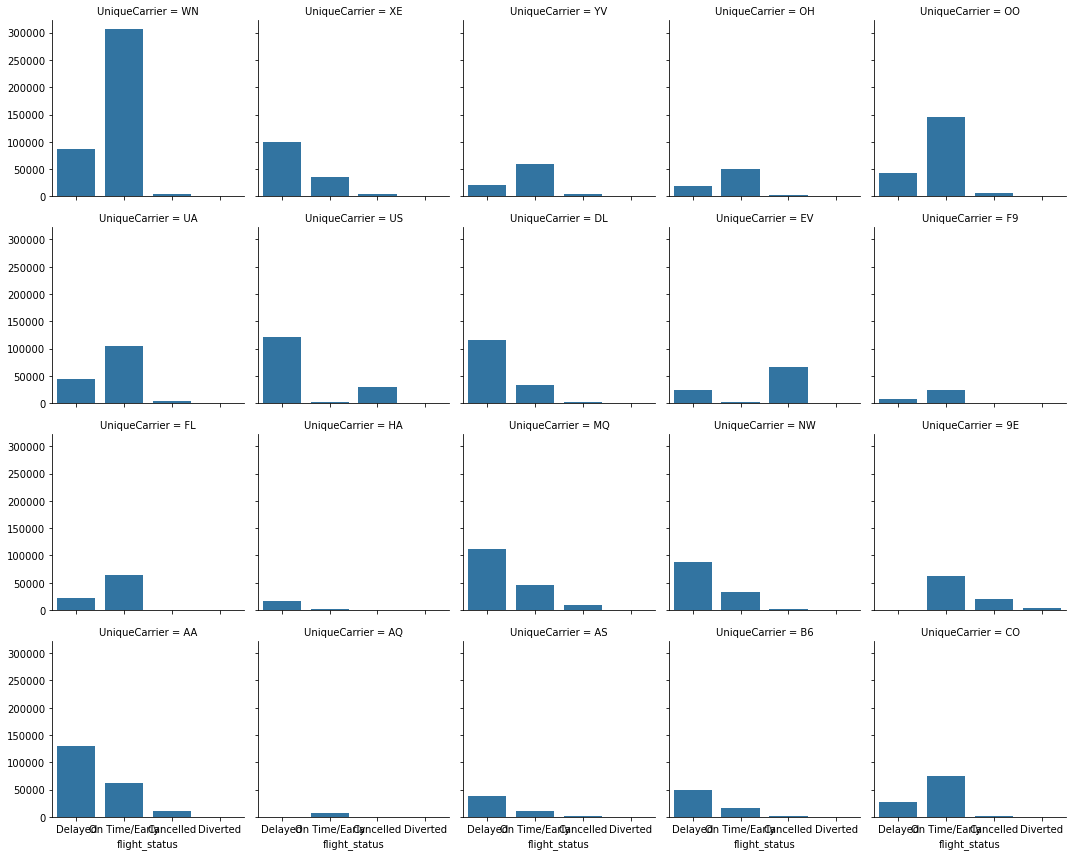

In [190]:
g = sb.FacetGrid(data = flights, col = 'UniqueCarrier', col_wrap = 5)
g.map(sb.countplot, 'flight_status');